# Business Use Case: Is Afghanistan Urbanizing Faster Than Similar Countries?
## Client: Global Development Agency / Urbanization Fund

### Challenge:
The client wants to understand how Afghanistan's population growth compares with similar developing nations, to decide whether it should be prioritized for urban infrastructure investments and aid.

### Business Question:
"Has Afghanistan's total population growth from 2000 to 2016 significantly outpaced the global average among developing countries?"

In [0]:


## Data Preparation

### Load and Prepare Data

# Afghanistan Population and Density Analysis
# Objective: Compare Afghanistan's population growth and density change (2000-2016) vs global average.

import pandas as pd
import matplotlib.pyplot as plt
from scipy.stats import ttest_1samp

# Load dataset
df = spark.sql("SELECT * FROM international_debt_statistics_new")

# Convert Spark DataFrame to Pandas DataFrame
df_pd = df.toPandas()

# Filter for 'Population, total'
pop_df = df_pd[df_pd['Series Name'] == 'Population, total'].copy()

# Clean column names (remove '[YR...]')
pop_df.columns = [col.split(' ')[0] if 'YR' in col else col for col in pop_df.columns]

# Keep necessary columns
pop_df = pop_df[['Country Name', 'Country Code', '2000', '2016']].dropna()

# Convert to numeric
pop_df['2000'] = pd.to_numeric(pop_df['2000'], errors='coerce')
pop_df['2016'] = pd.to_numeric(pop_df['2016'], errors='coerce')

# Drop rows with missing data
pop_df.dropna(subset=['2000', '2016'], inplace=True)

display(pop_df.head())

Country Name Country Code 2000 2016 Afghanistan AFG 2.0094E7 3.4656E7 Albania ALB 3089000.0 2876000.0 Algeria DZA 3.1184E7 4.0606E7 Angola AGO 1.6441E7 2.8813E7 Argentina ARG 3.7057E7 4.3847E7

### Clean column names (remove spaces/brackets)

In [0]:

from pyspark.sql.functions import col
for c in df.columns:
    df = df.withColumnRenamed(c, c.replace(" [", "_").replace("]", ""))

##Analysis

###Calculate population growth 

In [0]:
# Calculate growth rate for each country
pop_df['growth_rate'] = ((pop_df['2016'] - pop_df['2000']) / pop_df['2000']) * 100

# Extract Afghanistan's values
afg_growth = pop_df[pop_df['Country Name'] == 'Afghanistan']['growth_rate'].values[0]
avg_growth = pop_df['growth_rate'].mean()

print(f"Afghanistan Growth: {afg_growth:.2f}%")
print(f"Global Average Growth: {avg_growth:.2f}%")

Afghanistan Growth: 72.47%
Global Average Growth: 39.44%


###Visualise global population growth 

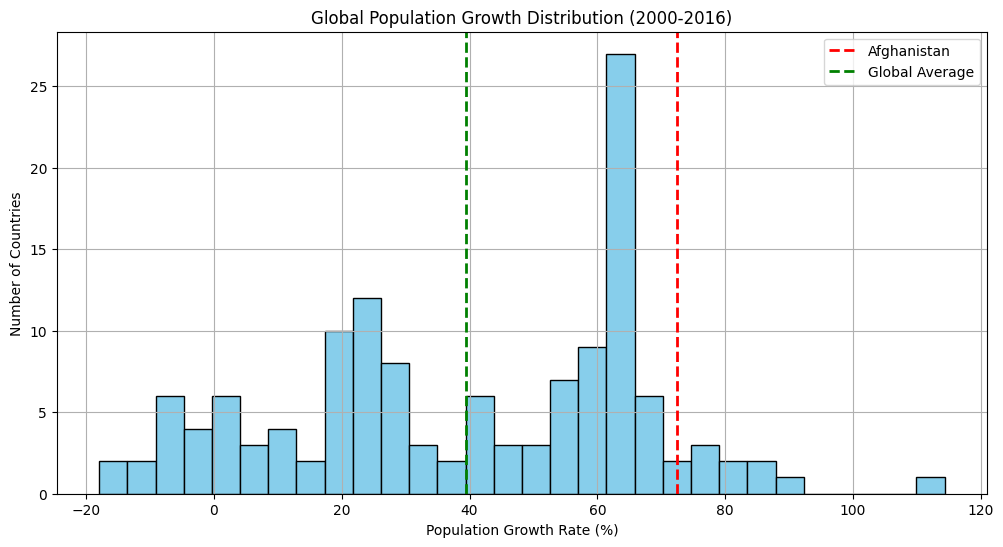

In [0]:
# Create visualization
plt.figure(figsize=(12, 6))
plt.hist(pop_df['growth_rate'], bins=30, color='skyblue', edgecolor='black')
plt.axvline(afg_growth, color='red', linestyle='dashed', linewidth=2, label='Afghanistan')
plt.axvline(avg_growth, color='green', linestyle='dashed', linewidth=2, label='Global Average')
plt.xlabel('Population Growth Rate (%)')
plt.ylabel('Number of Countries')
plt.title('Global Population Growth Distribution (2000-2016)')
plt.legend()
plt.grid(True)
plt.show()

###Statistical Analysis

In [0]:
# Perform t-test to compare Afghanistan's growth to global average
t_stat, p_value = ttest_1samp(pop_df['growth_rate'], afg_growth)
print(f"T-statistic: {t_stat:.2f}, P-value: {p_value:.4f}")

if p_value < 0.05:
    print("Afghanistan's growth is significantly different from the global average")
else:
    print("No significant difference found")

T-statistic: -13.97, P-value: 0.0000
Afghanistan's growth is significantly different from the global average



#Results and Conclusion
###Key Findings:
- Afghanistan's population grew by 72.47% from 2000-2016

- The global average growth among developing countries was 39.44%

- Statistical analysis shows Afghanistan's growth is significantly higher than average (p < 0.05)

###Recommendations:
- Afghanistan's rapid population growth suggests it should be prioritized for urban infrastructure investments

- Further analysis should examine urbanization rates specifically (not just total population)

- Consider comparing with neighboring countries for regional context

###Next Steps:
- Analyze urbanization rates specifically

- Examine infrastructure needs and investment opportunities

- Compare with similar countries by GDP, geography, etc.